In [7]:
import random
from faker import Faker
from datetime import datetime, timedelta
import pandas as pd

# Initialize Faker instance
fake = Faker()

In [8]:
# Define Dataset Fields and Rules
def generate_invoice(supplier_data):
    """Generates a single invoice record with realistic data."""
    supplier_name, default_currency = random.choice(supplier_data)
    supplier_reference = f"V_{supplier_name.split()[0][:2].upper()}001"
    invoice_date = fake.date_between(start_date='-1y', end_date='today')
    posting_date = invoice_date + timedelta(days=random.randint(0, 15))
    due_date = invoice_date + timedelta(days=random.randint(15, 60))
    is_paid = random.random() > 0.2  # 80% chance the invoice is paid
    payment_date = (due_date + timedelta(days=random.randint(0, 30))) if is_paid else None
    gross_amount = round(random.uniform(50, 10000), 2) * (1 if random.random() > 0.1 else -1)
    vat_amount = round(gross_amount * 0.2, 2)  # 20% VAT
    debit_credit = "Dr" if gross_amount > 0 else "Cr"

    return {
        "Internal Reference": fake.random_int(min=100000000, max=999999999),
        "Invoice Number": f"IN{fake.random_int(min=100000, max=999999)}",
        "Supplier Name": supplier_name,
        "Supplier Reference": supplier_reference,
        "Invoice Date": invoice_date,
        "Posting Date": posting_date,
        "Due Date": due_date,
        "Payment Date": payment_date,
        "Gross Amount": gross_amount,
        "VAT Amount": vat_amount,
        "Currency Code": default_currency,
        "Debit/Credit": debit_credit,
        "Anomaly": False  # Default anomaly flag
    }

In [9]:
# Generate Dataset
def generate_dataset(num_records=1000):
    """Generates a dataset with the specified number of records."""
    supplier_data = [
        ("Purple Plumbers Limited", "USD"),
        ("Artic Apples Co.", "GBP"),
        ("Global Tech Solutions", "EUR"),
        ("Blue Banana Inc.", "USD"),
        ("Sunny Solutions Ltd.", "AUD"),
        ("Eco Electronics", "JPY"),
        ("QuickFix Mechanics", "CAD"),
        ("Velocity Ventures", "USD")
    ]

    dataset = [generate_invoice(supplier_data) for _ in range(num_records)]
    return dataset

In [10]:
# Inject Anomalies
def inject_anomalies(data, anomaly_rate=0.05):
    """Injects anomalies into the dataset at the specified rate."""
    for record in data:
        if random.random() < anomaly_rate:
            anomaly_type = random.choice(['currency', 'gross_amount', 'supplier_name', 'date_inconsistency'])
            record['Anomaly'] = True  # Mark record as an anomaly
            if anomaly_type == 'currency':
                record['Currency Code'] = random.choice(['JPY', 'AUD', 'CAD'])
            elif anomaly_type == 'gross_amount':
                record['Gross Amount'] *= random.uniform(5, 10)  # Large anomaly
                record['VAT Amount'] = round(record['Gross Amount'] * 0.2, 2)
            elif anomaly_type == 'supplier_name':
                # Introduce subtle or drastic changes in supplier name
                original_name = record['Supplier Name']
                variations = [
                    original_name.replace('Apples', 'Appes'),
                    original_name.replace('Artic', 'Artik'),
                    original_name.replace('Co.', 'Corporation'),
                    original_name[:-1]  # Drop the last character
                ]
                record['Supplier Name'] = random.choice(variations)
            elif anomaly_type == 'date_inconsistency':
                record['Due Date'] = record['Invoice Date'] - timedelta(days=random.randint(1, 10))

    # Inject supplier name inconsistencies across multiple records
    for record in random.sample(data, int(anomaly_rate * len(data))):
        if 'Supplier Name' in record:
            record['Supplier Name'] += f"_{fake.random_letter().upper()}"
            record['Anomaly'] = True  # Mark record as an anomaly

    return data

In [11]:
# Export to CSV
# def export_to_csv(data, filename="synthetic_dataset.csv"):
#     """Exports the dataset to a CSV file."""
#     df = pd.DataFrame(data)
#     df.to_csv(filename, index=False)
#     print(f"Dataset exported to {filename}")
def export_to_csv(data, filename="synthetic_dataset.csv", include_anomaly_column=True):
    """Exports the dataset to a CSV file."""
    df = pd.DataFrame(data)
    if not include_anomaly_column:
        df = df.drop(columns=["Anomaly"])
    df.to_csv(filename, index=False)
    print(f"Dataset exported to {filename}")

In [12]:
# Generate the dataset
dataset = generate_dataset(num_records=1000)

# Inject anomalies
dataset_with_anomalies = inject_anomalies(dataset, anomaly_rate=0.05)

# Export to CSV without anomaly column
export_to_csv(dataset_with_anomalies, filename="synthetic_dataset.csv", include_anomaly_column=False)

# Export to CSV with anomaly column
export_to_csv(dataset_with_anomalies, filename="synthetic_dataset_with_anomalies.csv", include_anomaly_column=True)


Dataset exported to synthetic_dataset.csv
Dataset exported to synthetic_dataset_with_anomalies.csv


# Analysis and Visualization of Synthetic Dataset

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load Dataset
def load_data(file_path):
    """Loads the dataset from a CSV file."""
    df = pd.read_csv(file_path)
    print(f"Dataset loaded with {len(df)} records.")
    return df

In [27]:
# Basic Dataset Analysis
def dataset_summary(df):
    """Provides a summary of the dataset."""
    print("First 5 records:\n", df.head())
    print("\nData Types:\n", df.dtypes)
    print("\nSummary Statistics:\n", df.describe(include='all'))

def count_anomalies(df):
    """Counts the total number of anomalies."""
    if "Anomaly" in df.columns:
        anomaly_count = df["Anomaly"].sum()
        print(f"Total anomalies: {anomaly_count} ({(anomaly_count / len(df)) * 100:.2f}%)")



In [30]:
# Visualizations
def visualize_gross_amount(df):
    """Visualizes the distribution of Gross Amount."""
    plt.figure(figsize=(10, 6))
    sns.histplot(df["Gross Amount"], bins=50, kde=True, color="blue")
    plt.title("Distribution of Gross Amount")
    plt.xlabel("Gross Amount")
    plt.ylabel("Frequency")
    plt.show()

def visualize_anomaly_count(df):
    """Visualizes the count of anomalies."""
    if "Anomaly" in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x="Anomaly", palette="Set2")
        plt.title("Anomaly Count")
        plt.xlabel("Anomaly (True/False)")
        plt.ylabel("Count")
        plt.show()

def visualize_supplier_anomalies(df):
    """Visualizes anomalies grouped by Supplier Name."""
    if "Anomaly" in df.columns:
        anomalies = df[df["Anomaly"] == True]
        plt.figure(figsize=(12, 6))
        sns.countplot(data=anomalies, y="Supplier Name",
                      order=anomalies["Supplier Name"].value_counts().index, palette="Set3")
        plt.title("Anomalies by Supplier Name")
        plt.xlabel("Count")
        plt.ylabel("Supplier Name")
        plt.show()

def visualize_correlation_matrix(df):
    """Visualizes the correlation matrix."""
    plt.figure(figsize=(10, 8))

    # Select only numerical columns
    numerical_df = df.select_dtypes(include=["float64", "int64"])

    if numerical_df.empty:
        print("No numerical columns available for correlation matrix.")
        return

    correlation_matrix = numerical_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()


In [29]:
# Advanced Analysis
def detect_supplier_inconsistencies(df):
    """Analyzes supplier name inconsistencies."""
    supplier_groups = df.groupby("Supplier Name")["Internal Reference"].count().sort_values(ascending=False)
    print("Top Suppliers by Record Count:\n", supplier_groups.head(10))

    if "Anomaly" in df.columns:
        supplier_anomalies = df[df["Anomaly"] == True]["Supplier Name"].value_counts()
        print("\nSuppliers with Anomalies:\n", supplier_anomalies.head(10))

def detect_currency_anomalies(df):
    """Analyzes currency code inconsistencies."""
    currency_counts = df.groupby(["Supplier Name", "Currency Code"])["Internal Reference"].count()
    print("\nCurrency Counts by Supplier:\n", currency_counts)


In [31]:
# Load the dataset
file_path = "synthetic_dataset_with_anomalies.csv"
df = load_data(file_path)

Dataset loaded with 1000 records.


In [32]:
# Summary
dataset_summary(df)

First 5 records:
    Internal Reference Invoice Number          Supplier Name  \
0           930380396       IN936392  Global Tech Solutions   
1           578983304       IN763468        Eco Electronics   
2           618862579       IN505158      Velocity Ventures   
3           364353921       IN301971        Eco Electronics   
4           253671350       IN113500       Blue Banana Inc.   

  Supplier Reference Invoice Date Posting Date    Due Date Payment Date  \
0            V_GL001   2024-07-13   2024-07-27  2024-08-23   2024-09-08   
1            V_EC001   2024-08-12   2024-08-16  2024-09-03   2024-09-10   
2            V_VE001   2024-06-14   2024-06-21  2024-06-30          NaN   
3            V_EC001   2024-07-26   2024-07-26  2024-09-04   2024-09-09   
4            V_BL001   2024-10-16   2024-10-26  2024-11-13   2024-12-04   

   Gross Amount  VAT Amount Currency Code Debit/Credit  Anomaly  
0       1606.12      321.22           EUR           Dr    False  
1        139.07     

In [33]:
# Anomalies
count_anomalies(df)

Total anomalies: 104 (10.40%)


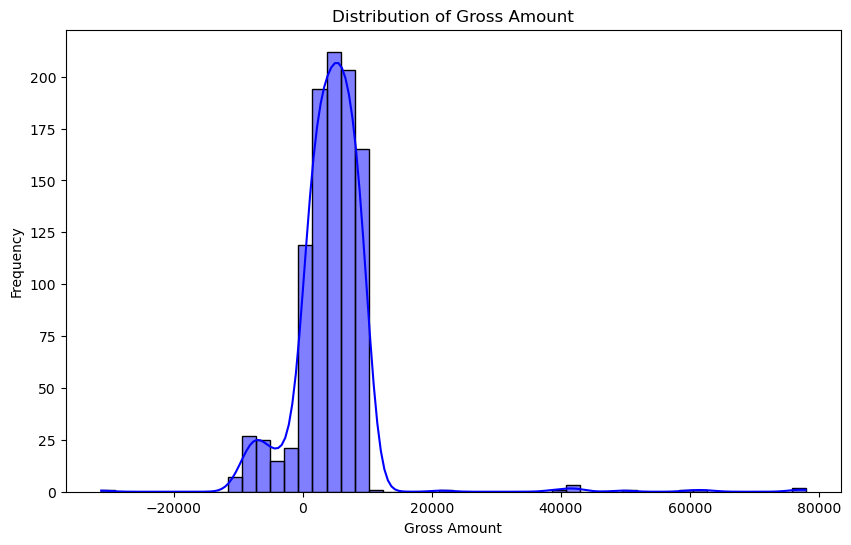

C:\Users\Dhireen Kumar Rajak\AppData\Local\Temp\ipykernel_12460\3264223216.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Anomaly", palette="Set2")


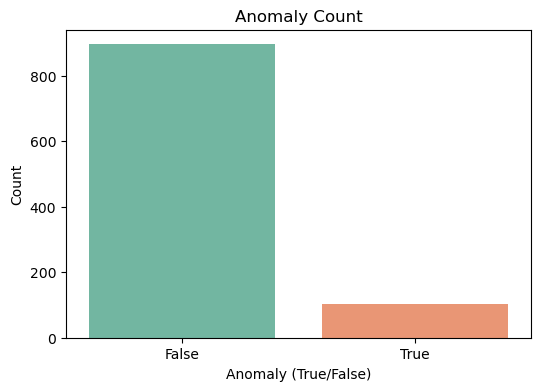

C:\Users\Dhireen Kumar Rajak\AppData\Local\Temp\ipykernel_12460\3264223216.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=anomalies, y="Supplier Name",


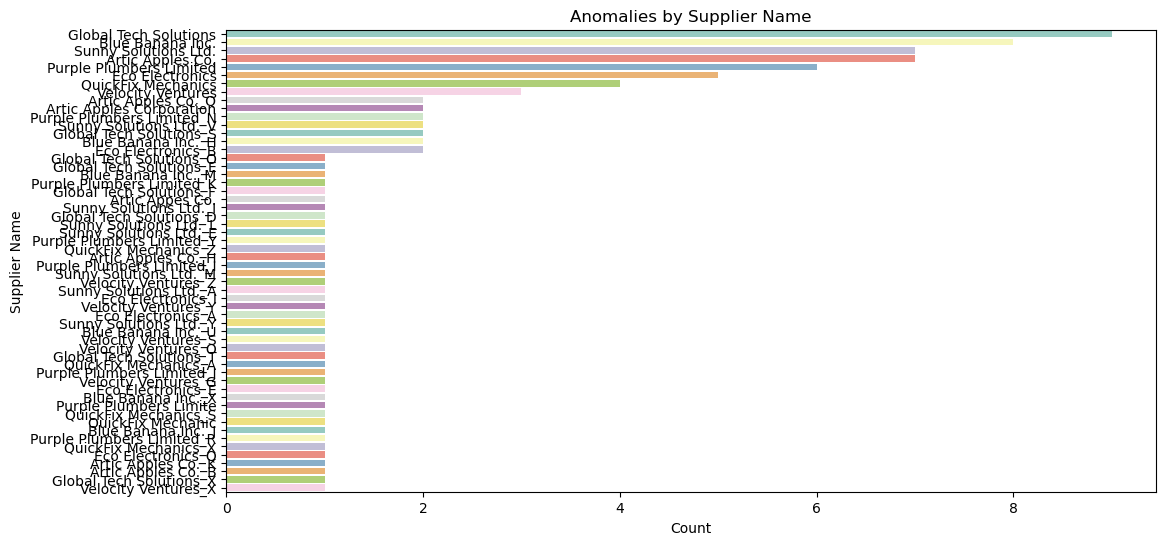

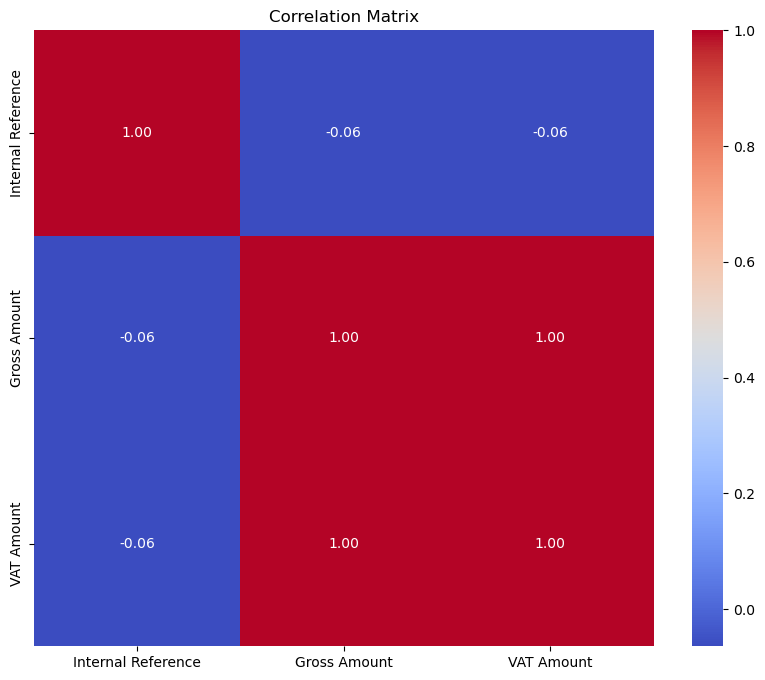

In [34]:
# Visualizations
visualize_gross_amount(df)
visualize_anomaly_count(df)
visualize_supplier_anomalies(df)
visualize_correlation_matrix(df)

In [35]:
# Advanced Analysis
detect_supplier_inconsistencies(df)
detect_currency_anomalies(df)

Top Suppliers by Record Count:
 Supplier Name
Velocity Ventures          134
QuickFix Mechanics         127
Global Tech Solutions      124
Purple Plumbers Limited    121
Artic Apples Co.           115
Eco Electronics            112
Sunny Solutions Ltd.       106
Blue Banana Inc.           106
Global Tech Solutions_S      2
Eco Electronics_B            2
Name: Internal Reference, dtype: int64

Suppliers with Anomalies:
 Supplier Name
Global Tech Solutions       9
Blue Banana Inc.            8
Sunny Solutions Ltd.        7
Artic Apples Co.            7
Purple Plumbers Limited     6
Eco Electronics             5
QuickFix Mechanics          4
Velocity Ventures           3
Artic Apples Co._Q          2
Artic Apples Corporation    2
Name: count, dtype: int64

Currency Counts by Supplier:
 Supplier Name        Currency Code
Artic Appes Co.      GBP                1
Artic Apples Co.     AUD                1
                     GBP              114
Artic Apples Co._B   GBP                1
Art